# Supervised Learning

In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

from train_test import get_train_test
from preprocessing import get_sup_df

### Initial Data Exploration

c:\Dev\Pre-Existing-Factors\preprocessing.py:98: DtypeWarning: Columns (19,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, dtype=column_types)


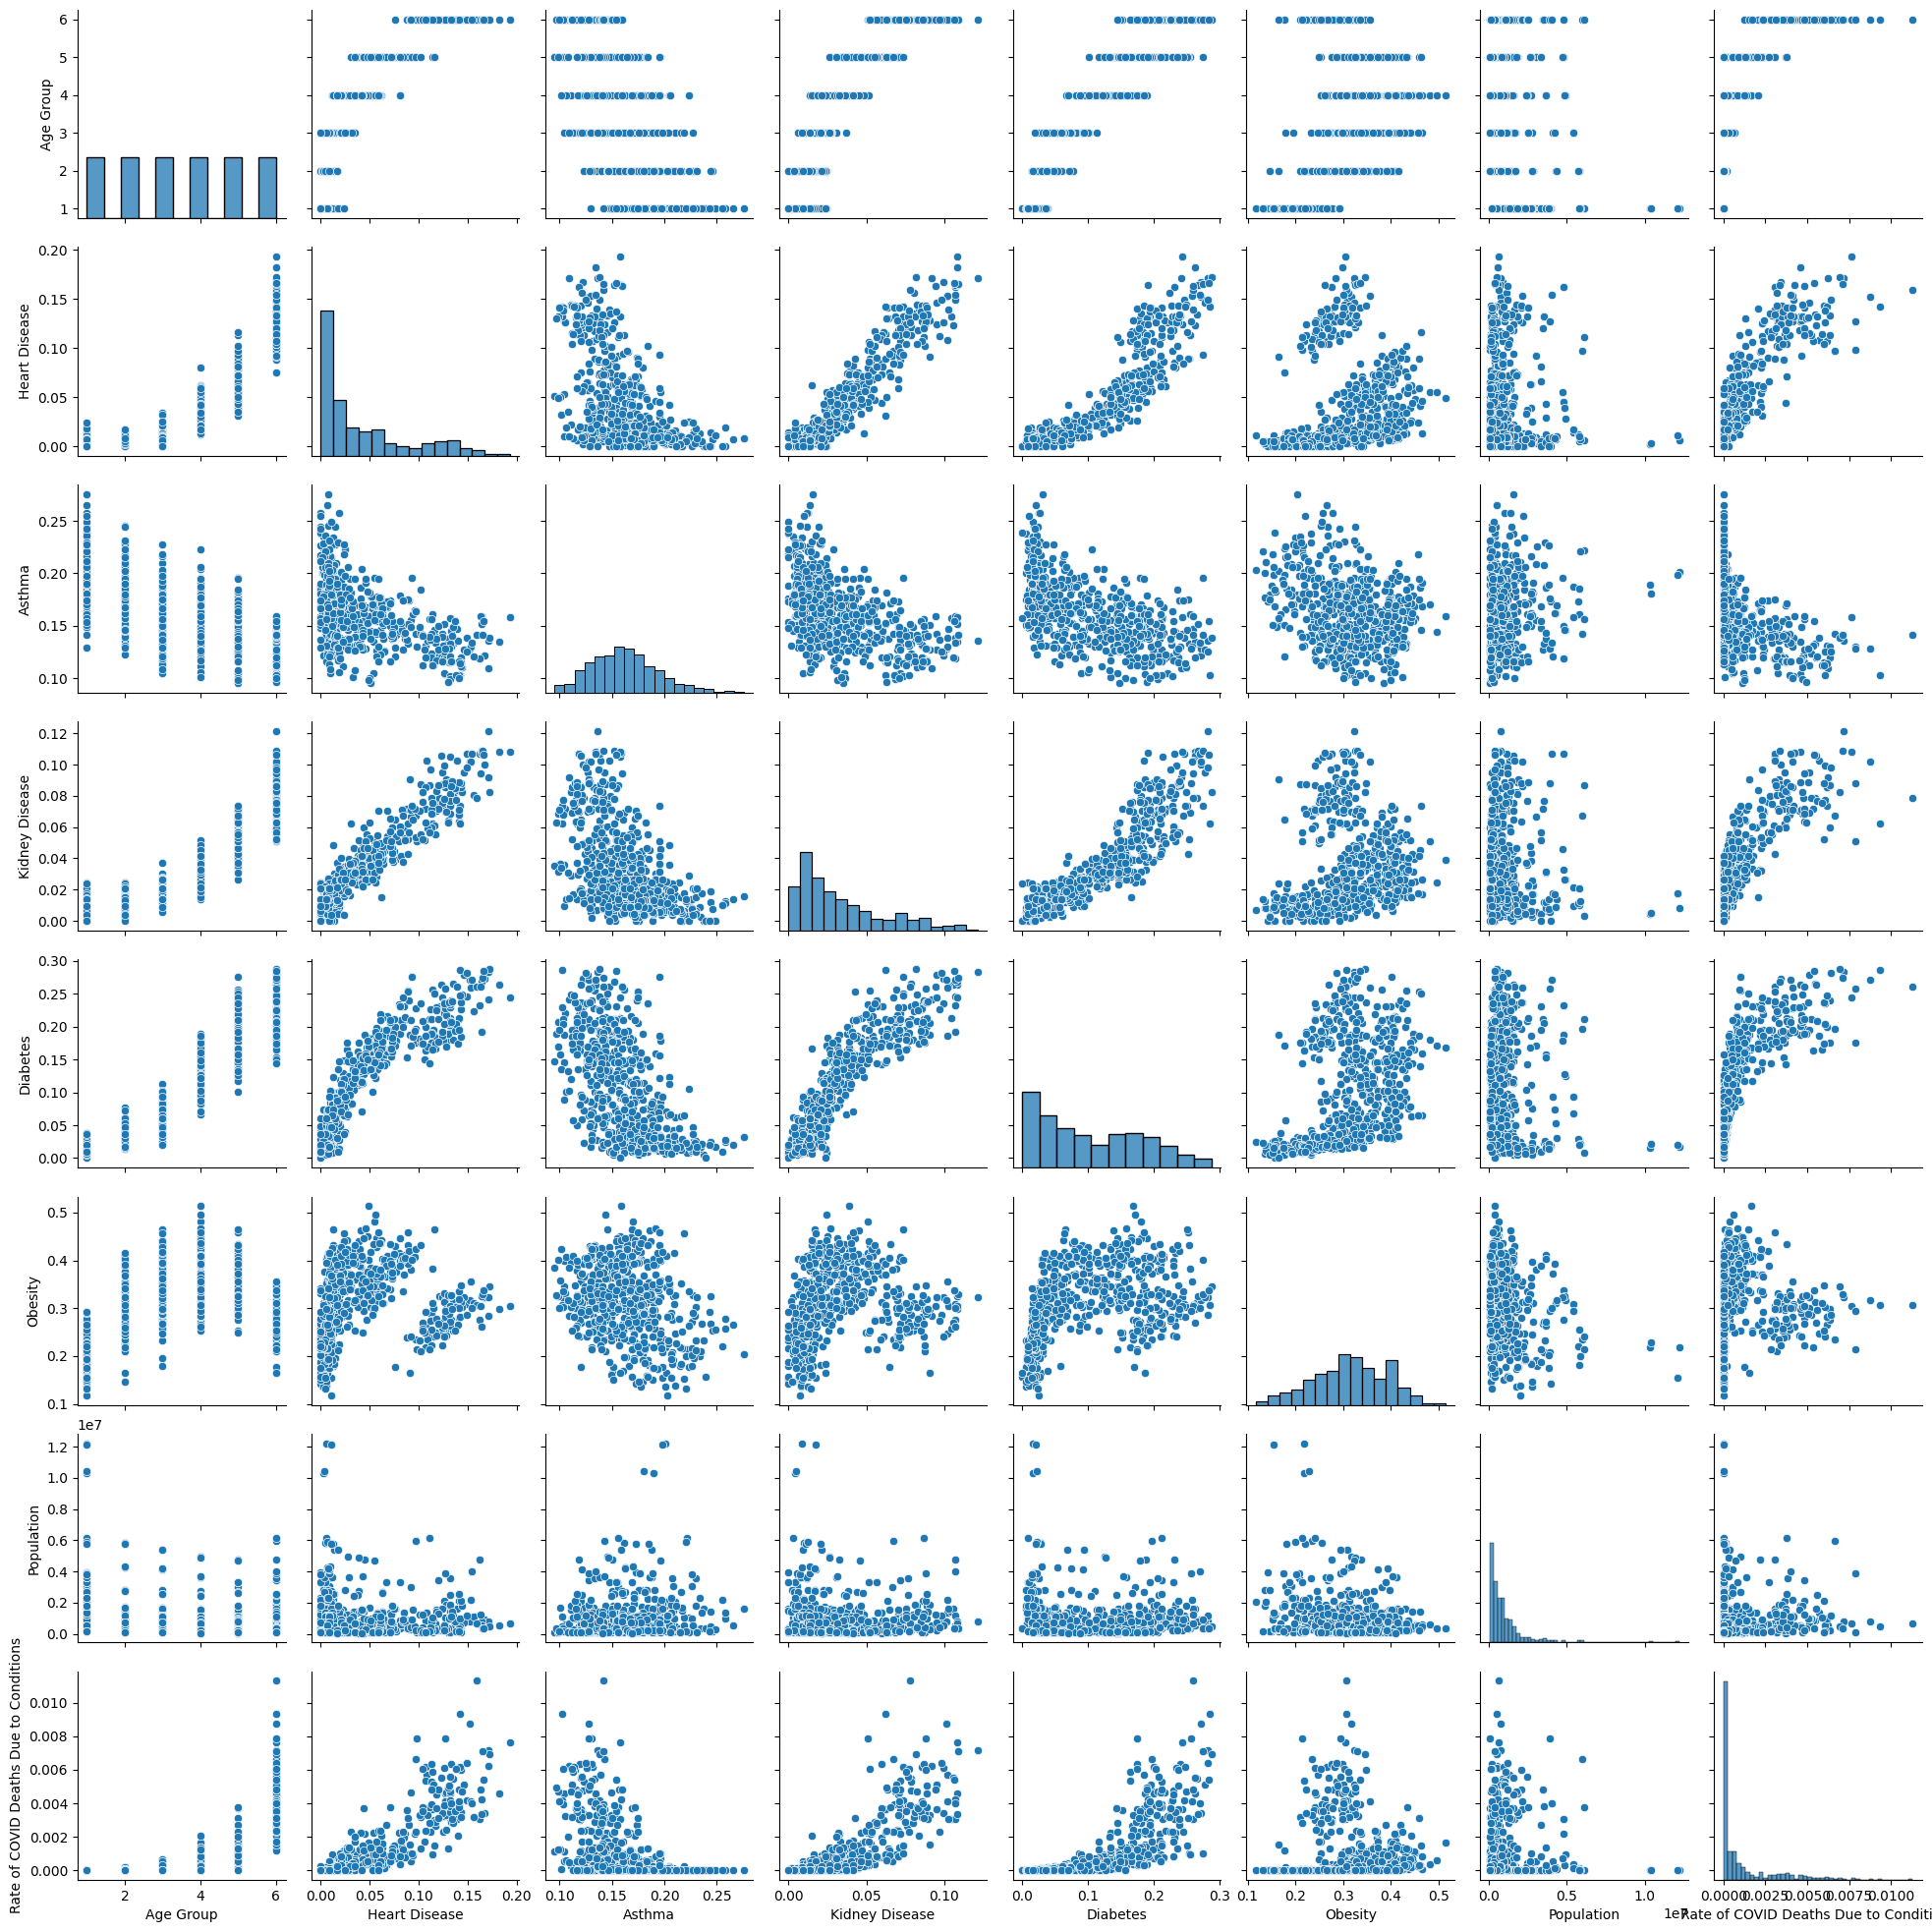

In [44]:
df = get_sup_df()
df = df[['Age Group', 'Heart Disease', 'Asthma', 'Kidney Disease', 'Diabetes', 'Obesity', 'Population', 'Rate of COVID Deaths Due to Conditions']]
#sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True)
sns.pairplot(df)

### Initial Model Exploration and Testing

#### Linear and Ridge Regression

In [119]:
# Apply polynomial features, determine optimal degree
def get_best_polynomial():
    # X, y = prepare_X_y()
    X_tr, X_tst, y_tr, y_tst = get_train_test()
    r2_train, r2_test = [], []
    for i in range(5):
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_tr)

        model = LinearRegression().fit(X_train_poly, y_tr)

        y_pred_tr = model.predict(X_train_poly)
        y_pred_tst = model.predict(poly.transform(X_tst))

        r2train = r2_score(y_tr, y_pred_tr)
        r2test = r2_score(y_tst, y_pred_tst)

        r2_train.append(r2train)
        r2_test.append(r2test)

    # uncomment and comment section above for polynomial features with ridge regression
    # for i in range(5):
    #     poly = PolynomialFeatures(degree=i)
    #     X_train_poly = poly.fit_transform(X_tr)
    #     X_test_poly = poly.transform(X_tst)

    #     model = Ridge(alpha = 0.5).fit(X_train_poly, y_tr)

    #     y_pred_tr = model.predict(X_train_poly).transpose()
    #     y_pred_tst = model.predict(X_test_poly).transpose()

    #     r2train = r2_score(y_tr, y_pred_tr)
    #     r2test = r2_score(y_tst, y_pred_tst)

    #     r2_train.append(r2train)
    #     r2_test.append(r2test)

    return r2_train, r2_test

In [120]:
get_best_polynomial()

c:\Dev\Pre-Existing-Factors\preprocessing.py:98: DtypeWarning: Columns (19,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, dtype=column_types)


([0.0,
  0.7804897834533703,
  0.8428247799903652,
  0.6514377278159487,
  0.2896695058450671],
 [-0.00028709188388376106,
  0.7319470014893497,
  0.7806279099394803,
  0.4163874562771144,
  -0.9274354155674227])

In [216]:
# Linear regression
# Try using polynomial features with degree 2, try normalizing the data
# Calculate 5 fold cross validation for hyperparameter tuning and determine the best hyperparameters, whether to normalize, and whether to use polynomial features

# Hyperparameter tuning using Randomized Search

def hyper_tuning(X_t, y_t):

    mod_randcv = LinearRegression()

    param_space = {'copy_X': [True, False],
                'fit_intercept': [True, False],
                'n_jobs': [1,3,5,7,None],
                'positive': [True, False]}
    #grid_search = GridSearchCV(mod_gridcv, param_space, cv = 5)
    rand_search = RandomizedSearchCV(mod_randcv, param_space, cv=5, random_state=0, n_iter = 8)
    rand_search.fit(X_t, y_t)
    hyper_best = rand_search.best_params_
    r2_mean_best = rand_search.best_score_
    r2_std_best = rand_search.cv_results_['std_test_score'][rand_search.best_index_]

    return hyper_best, r2_mean_best, r2_std_best

c:\Dev\Pre-Existing-Factors\preprocessing.py:98: DtypeWarning: Columns (19,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, dtype=column_types)


In [217]:
# No normalization
nn_hyperbest, nn_meanbest, nn_stdbest = hyper_tuning(X_train, y_train)
print(nn_hyperbest)
print(nn_meanbest)
print(nn_stdbest)

{'positive': False, 'n_jobs': 5, 'fit_intercept': True, 'copy_X': False}
0.7523106370805646
0.01747232535543693


In [218]:
model = LinearRegression(n_jobs = 5, copy_X = False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R2 Score: %.8f" % r2_score(y_test, y_pred))
print("MSE: %.8f" % mean_squared_error(y_test, y_pred))

R2 Score: 0.77871086
MSE: 0.00000055


In [219]:
# Polynomial features
X_train, X_test, y_train, y_test = get_train_test()
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
pf_hyperbest, pf_meanbest, pf_stdbest = hyper_tuning(X_train_poly, y_train)
print(pf_hyperbest)
print(pf_meanbest)
print(pf_stdbest)

c:\Dev\Pre-Existing-Factors\preprocessing.py:98: DtypeWarning: Columns (19,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, dtype=column_types)


{'positive': False, 'n_jobs': 5, 'fit_intercept': False, 'copy_X': True}
0.7910130582306563
0.02690838712189457


In [220]:
model = LinearRegression(n_jobs=5, fit_intercept = False)
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
print("R2 Score: %.8f" % r2_score(y_test, y_pred))
print("MSE: %.8f" % mean_squared_error(y_test, y_pred))

R2 Score: 0.84795950
MSE: 0.00000051


In [221]:
# Normalize
X_train, X_test, y_train, y_test = get_train_test()
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
nm_hyperbest, nm_meanbest, nm_stdbest = hyper_tuning(X_train_scaled, y_train)
print(nm_hyperbest)
print(nm_meanbest)
print(nm_stdbest)

c:\Dev\Pre-Existing-Factors\preprocessing.py:98: DtypeWarning: Columns (19,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, dtype=column_types)


{'positive': False, 'n_jobs': 5, 'fit_intercept': True, 'copy_X': False}
0.7802895648579858
0.03635752296122571


In [222]:
model = LinearRegression(n_jobs = 5, copy_X = False)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("R2 Score: %.8f" % r2_score(y_test, y_pred))
print("MSE: %.8f" % mean_squared_error(y_test, y_pred))

R2 Score: 0.71649369
MSE: 0.00000127


In [223]:
# Both
X_train, X_test, y_train, y_test = get_train_test()
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = MinMaxScaler().fit(X_train_poly)
X_train_scaled = scaler.transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)
bt_hyperbest, bt_meanbest, bt_stdbest = hyper_tuning(X_train_scaled, y_train)
print(bt_hyperbest)
print(bt_meanbest)
print(bt_stdbest)

c:\Dev\Pre-Existing-Factors\preprocessing.py:98: DtypeWarning: Columns (19,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, dtype=column_types)


{'positive': False, 'n_jobs': 5, 'fit_intercept': True, 'copy_X': False}
0.780367440762277
0.07015266791714277


In [225]:
model = LinearRegression(n_jobs = 5, copy_X = False)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("R2 Score: %.8f" % r2_score(y_test, y_pred))
print("MSE: %.8f" % mean_squared_error(y_test, y_pred))

R2 Score: 0.75250422
MSE: 0.00000056


In [226]:
# Ridge Regression
# Repeat all above steps, without the "no normalization" and "polynomial features only" tests because ridge regression requires normalization
# Hyperparameter tuning using Randomized Search

def hyper_tuning_ridge(X_train, y_train):

    mod_randcv = Ridge()

    param_space = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                'copy_X': [True, False],
                'fit_intercept': [True, False],
                'max_iter': [10,20,50,100,1000,10000,None],
                'positive': [True, False]}
    #grid_search = GridSearchCV(mod_gridcv, param_space, cv = 5)
    rand_search = RandomizedSearchCV(mod_randcv, param_space, cv=5, random_state=0)
    rand_search.fit(X_train, y_train)
    hyper_best = rand_search.best_params_
    r2_mean_best = rand_search.best_score_
    r2_std_best = rand_search.cv_results_['std_test_score'][rand_search.best_index_]

    return hyper_best, r2_mean_best, r2_std_best

c:\Dev\Pre-Existing-Factors\preprocessing.py:98: DtypeWarning: Columns (19,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, dtype=column_types)


In [227]:
# Normalize only
X_train, X_test, y_train, y_test = get_train_test()
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
nm_hyperbest, nm_meanbest, nm_stdbest = hyper_tuning_ridge(X_train_scaled, y_train)
print(nm_hyperbest)
print(nm_meanbest)
print(nm_stdbest)

c:\Dev\Pre-Existing-Factors\preprocessing.py:98: DtypeWarning: Columns (19,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, dtype=column_types)


{'positive': False, 'max_iter': 1000, 'fit_intercept': True, 'copy_X': True, 'alpha': 0.5}
0.7672287377182532
0.023288378383833946


In [228]:
model = Ridge(max_iter = 1000, alpha = 0.5, random_state=0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("R2 Score: %.8f" % r2_score(y_test, y_pred))
print("MSE: %.8f" % mean_squared_error(y_test, y_pred))

R2 Score: 0.72321484
MSE: 0.00000077


In [229]:
# Normalizing and polynomial features
X_train, X_test, y_train, y_test = get_train_test()
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = MinMaxScaler().fit(X_train_poly)
X_train_scaled = scaler.transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)
bt_hyperbest, bt_meanbest, bt_stdbest = hyper_tuning_ridge(X_train_scaled, y_train)
print(bt_hyperbest)
print(bt_meanbest)
print(bt_stdbest)

c:\Dev\Pre-Existing-Factors\preprocessing.py:98: DtypeWarning: Columns (19,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, dtype=column_types)


{'positive': False, 'max_iter': 1000, 'fit_intercept': True, 'copy_X': True, 'alpha': 0.5}
0.8228084617739924
0.031769245773533135


In [230]:
model = Ridge(max_iter = 1000, alpha = 0.5, random_state=0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("R2 Score: %.8f" % r2_score(y_test, y_pred))
print("MSE: %.8f" % mean_squared_error(y_test, y_pred))

R2 Score: 0.77982914
MSE: 0.00000053


The highest R2 score in testing is: 0.84795950 which comes from Linear Regression with polynomial features
The lowest MSE score in testing is: 0.00000051 which comes from Linear Regression with polynomial features.

For linear regression with polynomial features, the best parameters for 5-fold cv and hyperparameter tuning yielded a mean training r2 score of 0.7910 with std 0.0269. Optimized parameters were {'positive': False, 'n_jobs': 5, 'fit_intercept': False, 'copy_X': True}

#### Random Forest

In [238]:
def hyper_tuning_tree(X, y):

    mod_randcv = RandomForestRegressor()

    param_space = {'bootstrap': [True, False],
                   'max_depth': [10,20,30,40,50,80,100, None],
                   'min_samples_split': [2, 3, 4, 5],
                   'max_features': ['sqrt', None],
                   'min_samples_leaf': [1,2,3],
                   'n_estimators': [10,30,50,80,100],
                   'random_state': [0]
                   }
    #grid_search = GridSearchCV(mod_gridcv, param_space, cv = 5)
    rand_search = RandomizedSearchCV(mod_randcv, param_space, cv=5, n_iter = 20, random_state=0)
    rand_search.fit(X, y)

    hyper_best = rand_search.best_params_
    r2_mean_best = rand_search.best_score_
    r2_std_best = rand_search.cv_results_['std_test_score'][rand_search.best_index_]

    return hyper_best, r2_mean_best, r2_std_best

In [251]:
# No normalization needed with random forest regressors!
X_train, X_test, y_train, y_test = get_train_test()

hyperbest, meanbest, stdbest = hyper_tuning_tree(X_train, y_train)
print(hyperbest)
print(meanbest)
print(stdbest)

c:\Dev\Pre-Existing-Factors\preprocessing.py:98: DtypeWarning: Columns (19,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, dtype=column_types)


{'random_state': 0, 'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
0.8139652603841879
0.045467908779231785


In [258]:
model = RandomForestRegressor(n_estimators = 100, max_depth = 10, min_samples_split = 3, min_samples_leaf = 3, max_features = 'sqrt', bootstrap = True, random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("R2 Score: %.8f" % r2_score(y_test, y_pred))
print("MSE: %.8f" % mean_squared_error(y_test, y_pred))

R2 Score: 0.80311713
MSE: 0.00000062
R2 Score: 0.92046123
MSE: 0.00000024


The test r2 score is 0.80311713 with an MSE of 0.00000062. The optimized parameters had n_estimators = 100, max_depth = None, min_samples_split and min_samples_leaf = 3, max_features = 'sqrt', with bootstrapping set to True. With 5-fold cross validation using Randomized Search, this yielded a mean r2 training score of 0.813965 with std 0.0455

#### K-Nearest Neighbors Regression

In [283]:
def hyper_tuning_knn(X, y):

    mod_randcv = KNeighborsRegressor()

    param_space = {'n_neighbors': [5,10,15,20],
                   'weights': ['uniform', 'distance'],
                   'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'leaf_size': [10,15,20,30],
                   'p': [1,2],
                   }
    #grid_search = GridSearchCV(mod_gridcv, param_space, cv = 5)
    rand_search = RandomizedSearchCV(mod_randcv, param_space, cv=5, n_iter = 50, random_state=0, refit=False)
    rand_search.fit(X, y)

    hyper_best = rand_search.best_params_
    r2_mean_best = rand_search.best_score_
    r2_std_best = rand_search.cv_results_['std_test_score'][rand_search.best_index_]

    return hyper_best, r2_mean_best, r2_std_best

In [285]:
# Normalize
X_train, X_test, y_train, y_test = get_train_test()
scaler = MinMaxScaler().fit(X_train.values)
X_train_scaled = scaler.transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)
hyperbest, meanbest, stdbest = hyper_tuning_knn(X_train_scaled, y_train)
print(hyperbest)
print(meanbest)
print(stdbest)

c:\Dev\Pre-Existing-Factors\preprocessing.py:98: DtypeWarning: Columns (19,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, dtype=column_types)


{'weights': 'uniform', 'p': 2, 'n_neighbors': 10, 'leaf_size': 15, 'algorithm': 'kd_tree'}
0.8181154159863618
0.017821888139536828


In [294]:
model = KNeighborsRegressor(n_neighbors = 10, algorithm = 'kd_tree', leaf_size = 15)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)
print("R2 Score: %.8f" % r2_score(y_test, y_pred))
print("MSE: %.8f" % mean_squared_error(y_test, y_pred))

R2 Score: 0.84907967
MSE: 0.00000047


The test r2 score is 0.84907967 with an MSE of 0.00000047. The optimized parameters had n_neighbors = 10, algorithm = 'kd_tree', leaf_size = 15. With 5-fold cross validation using Randomized Search, this yielded a mean r2 training score of 0.8181 with std 0.0178

### Deeper Analysis on KNN Regression

#### Feature Importance and Ablation Analysis

In [ ]:
#some regression models have .feature_importance methods
#feature sensitivity - how does changing or removing features affect model performance

#### Sensitivity Analysis

In [ ]:
#SensitivityAnalyzer
#hyperparameter sensitivity

#### Tradeoffs

In [ ]:
#graphs baby graphs!

### Failure Analysis